In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc,classification_report, accuracy_score
import nltk
import re
import string
%matplotlib inline

import collections
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

from tensorflow.keras import layers

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
from google.colab import files
uploaded2 = files.upload()

Saving test.csv to test.csv


In [ ]:
import io
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
test = pd.read_csv(io.BytesIO(uploaded2['test.csv']))

In [ ]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
print('the shape of train is ', train.shape)
print('the shape of test is ', test.shape)

the shape of train is  (7613, 5)
the shape of test is  (3263, 4)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


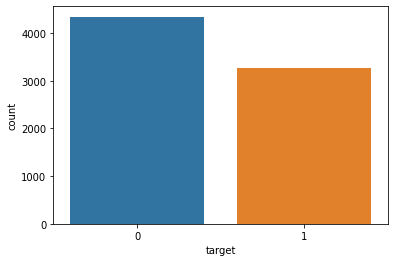

In [ ]:
import seaborn as sns
sns.countplot(train['target'])

Step 1: the first step is to clean the text or preprocess it ie. remove punctuations, make its lowercase, remove special characters or digits and remove stop words

In [ ]:
cleanup_re = re.compile('[^a-z]+')
def clean(sentence): 
  sentence = str(sentence)
  sentence = sentence.lower()
  sentence = cleanup_re.sub(' ', sentence).strip()
  return sentence
train['text'] = train['text'].apply(clean)
test['text'] = test['text'].apply(clean)

In [ ]:
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [ ]:
from textblob import TextBlob
def remPunct(sentence):
  sentence = TextBlob(sentence)
  sentence = ''.join(sentence)
  return sentence

train['text'] = train['text'].apply(remPunct)
test['text'] = test['text'].apply(remPunct)

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [ ]:
def preprocess(sentence):
  sentence = str(sentence)
  word_tokens = word_tokenize(sentence)
  stop_words = set(stopwords.words('english'))
  sentence = ' '.join([i for i in word_tokens if not i in stop_words])
  return sentence

train['text'] = train['text'].apply(preprocess)
test['text'] = test['text'].apply(preprocess)

In [ ]:
train['text'][45]

'gained followers last week know stats grow http co tiyulif c'

LSTM Modeling
Vectorize consumer complaints text, by turning each text into either a sequence of integers or into a vector.
Limit the data set to the top 5,0000 words.
Set the max number of words in each complaint 

Step 2. Tokenize the text using the keras so that we come to know the unique number of tokens in the text where we have following argument:
*   num_words - the maximum number of words to keep, based
    on word frequency. Only the most common `num_words-1` words will
    be kept.
*   filters -a string where each element is a character that will be
    filtered from the texts
*   lower -  Whether to convert the texts to lowercase.
*   seperator - Separator for word splitting.








In [ ]:
from tensorflow import keras

1.   tokenizer.fit_on_texts:
Updates internal vocabulary based on a list of texts.
In the case where texts contains lists, we assume each entry of the lists to be a token.
Required before using texts_to_sequences or texts_to_matrix.

2.   tokenizer.fit_on_sentences:
Updates internal vocabulary based on a list of sequences.
Required before using sequences_to_matrix (if fit_on_texts was never called).



In [ ]:
from keras.preprocessing.text import Tokenizer #description in step2

EMBEDDING_DIM/ Word embeddings are always around 100 and 300 in length, longer embedding vectors don't add enough information and smaller ones don't represent the semantics well enough

In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 8000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 50
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(train['text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 21976 unique tokens.


Step 3: keras.preprocessing.sequence import pad_sequences

This function transforms a list (of length num_samples) of sequences (lists of integers) into a 2D Numpy array of shape (num_samples, num_timesteps). num_timesteps is either the maxlen argument if provided, or the length of the longest sequence in the list.

1. Sequences that are shorter than num_timesteps are padded with value until they are num_timesteps long.

Sequences longer than num_timesteps are truncated so that they fit the desired length.

The position where padding or truncation happens is determined by the arguments padding and truncating, respectively. Pre-padding or removing values from the beginning of the sequence is the default.




In [ ]:
from keras.preprocessing.sequence import pad_sequences

In [ ]:
X = tokenizer.texts_to_sequences(train['text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (7613, 50)


Step 4: Splitting the data to train and test

In [ ]:
Y = train['target']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(6851, 50) (6851,)
(762, 50) (762,)


----The first layer is the embedded layer that uses 100 length vectors to represent each word.
----SpatialDropout1D performs variational dropout in NLP models.
----The next layer is the LSTM layer with 100 memory units.
----The output layer must create 13 output values, one for each class.
----Activation function is softmax for multi-class classification.
----Because it is a multi-class classification problem, categorical_crossentropy is used as the loss function.


Step 5: 


1.   Instantiate the sequential model
2.   second layer we have is an embedding layer with tf.keras.layers.Embedding(
    input_dim, output_dim, embeddings_initializer='uniform',
    embeddings_regularizer=None, activity_regularizer=None,
    embeddings_constraint=None, mask_zero=False, input_length=None, **kwargs
)
Turns positive integers (indexes) into dense vectors of fixed size.This layer can only be used as the first layer in a model.

*   input_dim - int > 0. Size of the vocabulary, i.e. maximum integer index + 1.
*   output_dim - int >= 0. Dimension of the dense embedding.
*   embeddings_initializer -Initializer for the embeddings matrix
*   input_length - Length of input sequences, when it is constant. This argument is required if you are going to connect Flatten then Dense layers upstream (without it, the shape of the dense outputs cannot be computed).









tf.keras.layers.LSTM(
    units, activation='tanh', recurrent_activation='sigmoid', use_bias=True,
    kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal',
    bias_initializer='zeros', unit_forget_bias=True, kernel_regularizer=None,
    recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None,
    kernel_constraint=None, recurrent_constraint=None, bias_constraint=None,
    dropout=0.0, recurrent_dropout=0.0, implementation=2, return_sequences=False,
    return_state=False, go_backwards=False, stateful=False, time_major=False,
    unroll=False, **kwargs
)

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import SpatialDropout1D
from keras.layers import Dense
from keras.layers import Bidirectional
from keras.layers import LSTM
from keras.callbacks import EarlyStopping

In [ ]:
embedding_vecor_length =50
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, embedding_vecor_length, input_length=MAX_SEQUENCE_LENGTH))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
history =model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=3, batch_size=64)


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 50, 50)            400000    
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               60400     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 460,501
Trainable params: 460,501
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 6851 samples, validate on 762 samples
Epoch 1/3
6851/6851 [==============================] - 9s 1ms/step - loss: 0.5632 - accuracy: 0.7025 - val_loss: 0.4697 - val_accuracy: 0.7874
Epoch 2/3
6851/6851 [==============================] - 8s 1ms/step - loss: 0.3368 - accuracy: 0.8613 - val_loss: 0.4910 - val_accuracy: 0.7703
Epoch 3/3
6851/6851 [==============================] - 8s 1ms/step - loss: 0.2414 - accuracy: 0.9045 - val_loss: 0.5640 - val_accuracy: 0.7690


In [ ]:
accr = model.evaluate(X_test,Y_test)

762/762 [==============================] - 0s 319us/step


In [ ]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.564
  Accuracy: 0.769
